# Cars' MPG prediction using Linear regression

First import the required library and import the data from files. Store the data into a dataframe and explore it.

In [24]:
# sklearn is the library that contains regression model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# pandas package will help a lot to process and import/export data
import pandas as pd
import numpy as np

# package that be used to plot
import matplotlib.pyplot as plt

#import data from file and set the name of each feature
data = pd.read_csv('auto-mpg.data', sep="\t", header=None)
data.columns = ["mpg", "cylinders", "displacement", "horsepower","weight","acceleration","model_year","origin","car_name"]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


After looking at the format of the data, we remove the unuseful data 'car_name' and process the data. Some of the features are continuous number which can be used directly in regression (but sometimes it's better to firstly normalize them in order to remove the affects from different units and dimension. But here for naive linear regression it's not necessary). Other features like "cylinders" are multi-valued discrete variables which are better to be treated as categorical variables.

In [25]:
# drop "car_name" column
data = data.drop(columns="car_name")

# convert "cylinders" and "origin" to dummy variable
data = pd.get_dummies(data, prefix=['cylinders', 'origin'], columns = ['cylinders', 'origin'])
data

,mpg,displacement,horsepower,weight,acceleration,model_year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
5,15.0,429.0,198.0,4341,10.0,70,0,0,0,0,1,1,0,0
6,14.0,454.0,220.0,4354,9.0,70,0,0,0,0,1,1,0,0
7,14.0,440.0,215.0,4312,8.5,70,0,0,0,0,1,1,0,0
8,14.0,455.0,225.0,4425,10.0,70,0,0,0,0,1,1,0,0
9,15.0,390.0,190.0,3850,8.5,70,0,0,0,0,1,1,0,0


Here we will show some statistics about the data which include the histogram of each feature and the correlation between each pair of variables.

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


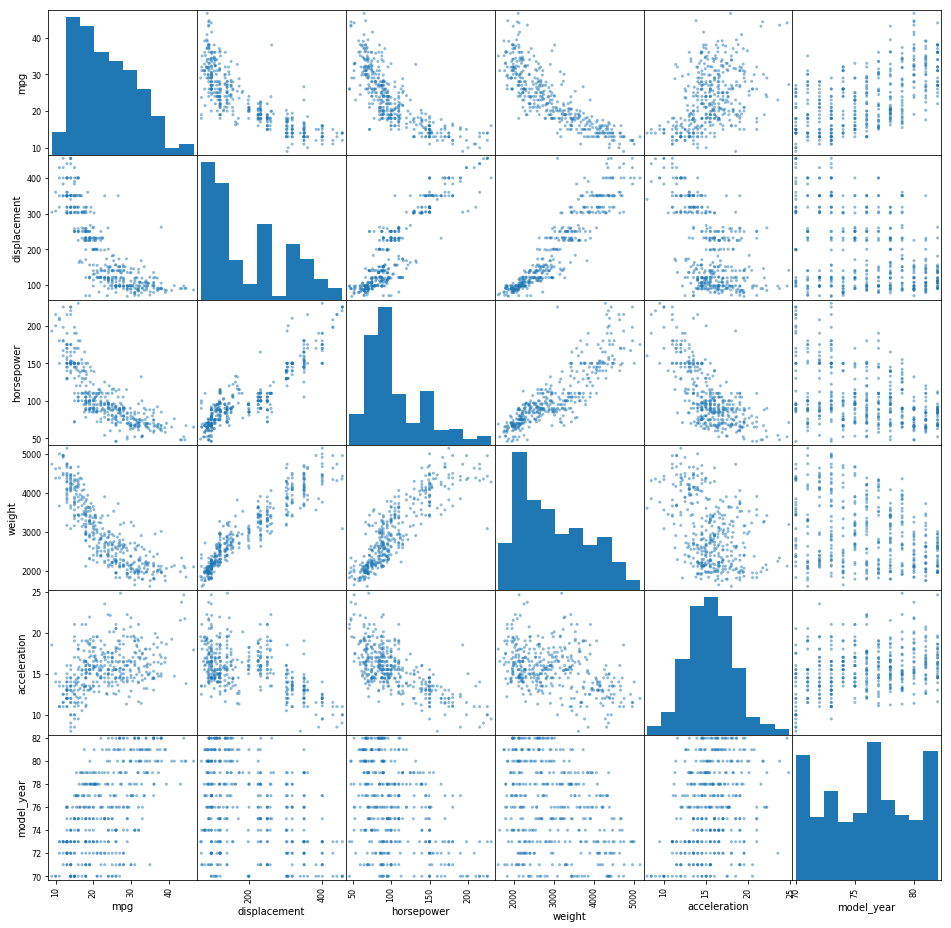

In [49]:
# plot the histogram as well as the correlation
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
pd.plotting.scatter_matrix(data[['mpg','displacement','horsepower','weight','acceleration','model_year']],ax = ax)
plt.show()

Split the whole data into test and train set. Train the linear model using processed training set and test it using testing set.

In [50]:
# split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="mpg"), data['mpg'], test_size=0.25)

# fit the linear model using training set
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# make a prediction
mpg_pred_train = regr.predict(X_train)
mpg_pred_test = regr.predict(X_test)

# output the training and testing error
print("Training error: %.2f" % mean_squared_error(y_train, mpg_pred_train))
print("Testing error: %.2f" % mean_squared_error(y_test, mpg_pred_test))

Training error: 9.91
Testing error: 7.85


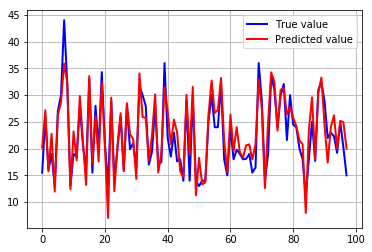

In [51]:
# visualize the result

fig = plt.figure()
ax = plt.axes()


ax.plot(np.array(y_test), color='blue', linewidth=2,label='True value')
ax.plot(np.array(mpg_pred_test), color='red', linewidth=2,label='Predicted value')

ax.legend()
plt.grid(True, which='both')

plt.show()